In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore")

In [2]:
n_experiments = 1000
layers = 5000

ns = 10*numpy.arange(1,11)
all_purities = []
for N in ns:
    state = numpy.zeros(N, dtype=numpy.complex128)
    state[0] = 1.0

    s = py_entropy.ThreadedSingleDefectStates(n_experiments, state)

    purities = s.apply_alternative_layers_and_save_mean_purity(layers, periodic_boundaries=False) - 1/N
    all_purities.append(purities)

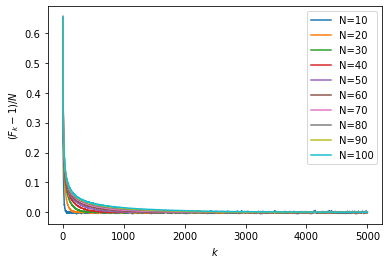

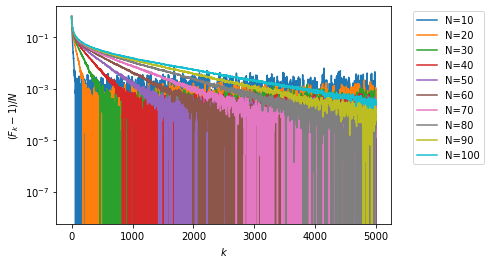

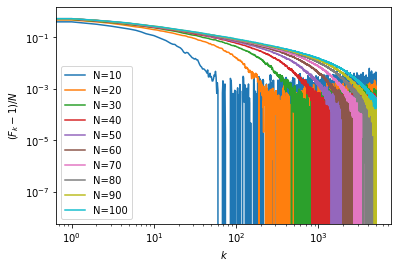

In [7]:
for N, purities in zip(ns, all_purities):
    pyplot.plot(purities, label=f"N={N}")
pyplot.xlabel('$k$')
pyplot.ylabel('$(F_k - 1)/N$')
pyplot.legend()
pyplot.show()

for N, purities in zip(ns, all_purities):
    pyplot.plot(purities, label=f"N={N}")
pyplot.xlabel('$k$')
pyplot.ylabel('$(F_k - 1)/N$')
pyplot.yscale('log')
pyplot.legend(bbox_to_anchor=(1.05, 1))
pyplot.show()

for N, purities in zip(ns, all_purities):
    pyplot.plot(purities, label=f"N={N}")
pyplot.xlabel('$k$')
pyplot.ylabel('$(F_k - 1)/N$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

In [14]:
@interact(alpha=1.0,beta=1.0)
def g(alpha,beta):
    for N, purities in zip(ns, all_purities):
        pyplot.plot(numpy.arange(purities.shape[0])*N**beta,purities*N**alpha, label=f"N={N}")
        pyplot.xlabel('$k$')
        pyplot.ylabel('$(F_k - 1)/N$')
        pyplot.yscale('log')
    pyplot.legend(bbox_to_anchor=(1.05, 1))
    pyplot.show()

interactive(children=(FloatSlider(value=1.0, description='alpha', max=3.0, min=-1.0), FloatSlider(value=1.0, d…

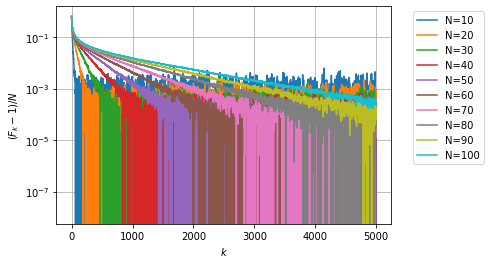

In [11]:
for N, purities in zip(ns, all_purities):
    pyplot.plot(purities, label=f"N={N}")
pyplot.xlabel('$k$')
pyplot.ylabel('$(F_k - 1)/N$')
pyplot.yscale('log')
pyplot.grid()
pyplot.legend(bbox_to_anchor=(1.05, 1))
pyplot.savefig('scales.jpg')
pyplot.show()